## 6. Numerical Elements -- Find your own 1D Oscillator (50pts)

We have built all the tools to study 1D unforced oscillators. Now you get to pick your own potential and study it. You can pick any 1D potential you like, but it should have a local minimum. Make sure it is not a driven oscillator (i.e., no explicit time dependence in the equations of motion). 

Here are some examples that you can choose from:
1. **Simple Pendulum (Nonlinear Small Angle Approximation)**:
   - Potential: $ V(\theta) = mgh(1 - \cos(\theta)) $, where $m$ is the mass, $g$ is the acceleration due to gravity, $h$ is the length of the pendulum, and $\theta$ is the angular displacement.
2. **Nonlinear Spring (Hardening or Softening)**:
   - Potential: $ V(x) = \frac{k}{2} x^2 + \frac{\beta}{3} x^3 $, where $k$ and $\beta$ are constants. Depending on the sign of $\beta$, the spring can exhibit hardening ($\beta > 0$) or softening ($\beta < 0$) nonlinearity.
3. **Lennard-Jones Potential Oscillator** (for a diatomic molecule model):
   - Potential: $ V(r) = 4\epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right] $, where $\epsilon$ is the depth of the potential well, $\sigma$ is the finite distance at which the inter-particle potential is zero, and $r$ is the distance between particles.
4. **Morse Potential (for molecular vibrations)**:
   - Potential: $ V(x) = D_e \left(1 - e^{-a(x - x_0)}\right)^2 $, where $D_e$ is the depth of the potential well, $a$ is a constant related to the width of the well, $x$ is the displacement from equilibrium, and $x_0$ is the equilibrium bond length. This potential models the energy of a diatomic molecule as a function of the distance between atoms, showing oscillatory behavior that represents molecular vibrations.
5. **Double Well Potential**:
   - Potential: $ V(x) = -\frac{\mu}{2} x^2 + \frac{\lambda}{4} x^4 $, where $\mu$ and $\lambda$ are positive constants. This system exhibits bistability with two stable equilibria, leading to interesting nonlinear dynamics and potential oscillations between the wells under certain conditions.

a. (5pts) Present the potential and describe its origin, why it is interesting, where it comes from, etc. Educate us about it.

#Part_A_5pts

I chose 1: the Simple Pendulum. The origin of it is that everything is a pendulum (inside joke) and just from it being the most simple, it was easiest to figure out the math of it for early physciisits. It is interesting because much of the stuff we now know how to do comes from this potential or at least is based off of it/related to it. 

b. (5pts) Plot the potential as a function of it's argument (and chosen variables) and find the equilibrium position of the potential, i.e. the position where the potential is at a minimum. 

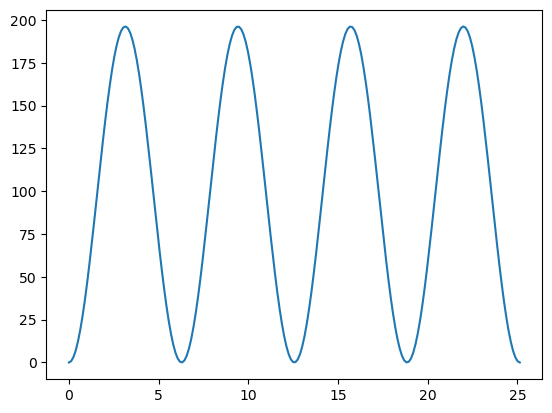

In [32]:
#Part_B_5pts
import numpy as np
import random
import matplotlib.pyplot as plt

m = 1
g = 9.81
h = 10

theta = np.linspace(0, 8 * np.pi, num=200)
pot = m*g*h*(1-np.cos(theta))

plt.plot(theta, pot);


#The minimum is anywhere where theta reaches n*pi where n is an even integrer. ex 0pi,2pi,4pi, etc

c. (10pts) Rewrite the potential in terms of the displacement from equilibrium. Expand the potential to second order to find the effective spring constant, $k$, for the potential near the minimum. What is the frequency of small oscillations about the minimum?

In [33]:
#Part_C_10pts

# dispacement form equilibrium => theta = 0 +phi as phi goes to 0 becuase of the minimum
phi = np.linspace(0, 2 * np.pi, num=200)

pot_new = m*g*h*(1-np.cos(theta+phi))

pot_fir_ord = m*g*h*np.sin(theta)  #theta = 0,replace cos(theta) with phi
pot_sec_ord = 1/2*m*g*h*phi**2  #m*g*h*cos(theta) #theta = 0, goes to 1,replace cos(theta) with phi as you derive

# U(phi) = 1/2k**2,  !!!! k = m*g*h

#freuencey:

# omega = sqrt(k/m)  = sqrt((m*g*h)/m)  = sqrt(g*h)
omega = np.sqrt(g*h)

#f = omega/2pi = sqrt(g*h)/2*pi

freq = np.sqrt(g*h)/2*np.pi

d. (10pts) Construct the equations of motion for the potential and solve them numerically. Choose initial conditions and parameters that give oscillatory motion. Note it doesn't have to be SHO (In fact, it probably won't be). Plot the position as a function of time. Make sure we can see the oscillations.

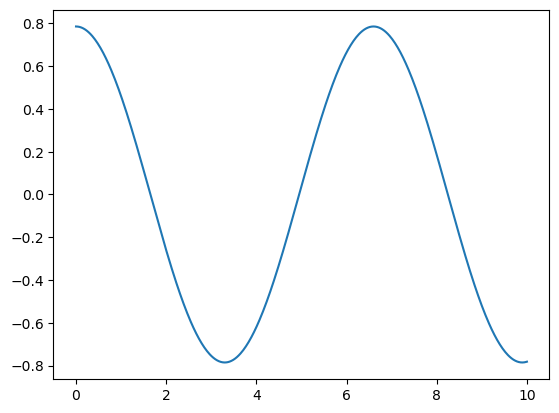

In [34]:
#Part_D_10pts
from scipy.integrate import odeint

t = np.linspace(0, 10, 500)
theta_0 = np.pi/4
omega_0 = 0

def equations(y, t, g, h):
    theta, omega = y
    dydt = [omega, -g / h * np.sin(theta)]
    return dydt

y0 = [theta_0, omega_0]
solution = odeint(equations, y0, t, args=(g, h))
theta_sol = solution[:, 0]

plt.plot(t,theta_sol);

e. (10pts) Plot the phase diagram of the trajectory (you don't have to produce a phase diagram, but just plot the trajectory in phase space). What does the phase diagram tell you about the motion?

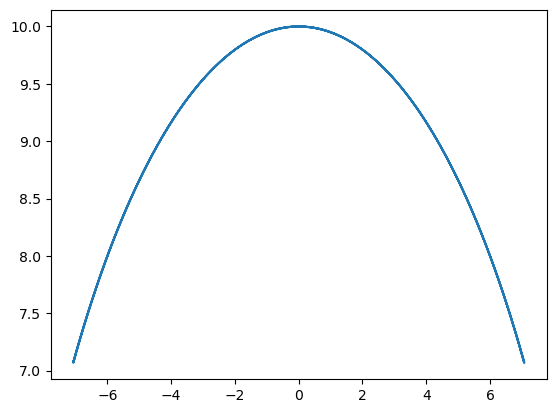

In [35]:
#Part_E_10pts

x = h * np.sin(theta_sol)
y = h * np.cos(theta_sol)

plt.plot(x, y);

f. (10pts) Find the period of your motion. Here you might have to make some definitions of what periodicity means for your potential.

In [37]:
#Part_F_10pts

#the period, just looking at the distance on this above plot, it looks like the period is around 12 seconds